<a href="https://colab.research.google.com/github/rinagobo/colab_notebooks/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape #(29322, 3)
df_pct_poverty.shape #(29329, 3)
df_pct_completed_hs.shape #(29329, 3)
df_share_race_city.shape #(29268, 7)
df_fatalities.shape #(2535, 14)

(2535, 14)

In [ ]:
df_hh_income.columns # 'Geographic Area', 'City', 'Median Income'
df_pct_poverty.columns # 'Geographic Area', 'City', 'poverty_rate'
df_pct_completed_hs.columns # 'Geographic Area', 'City', 'percent_completed_hs'
df_share_race_city.columns # 'Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'
df_fatalities.columns # 'id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender','race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
## NaN values are blank cells or cells that contain strings instead of numbers.

df_hh_income.isna().values.any() #True
df_hh_income.duplicated().values.any() #False
df_pct_poverty.isna().values.any() #False
df_pct_poverty.duplicated().values.any() #False
df_pct_completed_hs.isna().values.any() #False
df_pct_completed_hs.duplicated().values.any() #False
df_share_race_city.isna().values.any() #False
df_share_race_city.duplicated().values.any() #False
df_fatalities.isna().values.any() #True
df_fatalities.duplicated().values.any() #False

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
cleaned_df_hh_income = df_hh_income.dropna()
cleaned_df_hh_income.shape # (29271, 3)

(29271, 3)

In [ ]:
cleaned_df_fatalities = df_fatalities.dropna()
cleaned_df_fatalities.shape # (2254, 14)

(2254, 14)

In [ ]:
## It seems that there are NaN values not detected by .isna()
## There are cells with 0 so I assumed ' ' is NaN value not 0
df_pct_poverty.poverty_rate.loc[df_pct_poverty['poverty_rate']== ' '] # 201 items

## np.nan replace ' ' to make ' ' values be detected by .isna()
df_pct_poverty.poverty_rate.replace(' ', np.nan, inplace=True)
df_pct_poverty.isna().values.any() #True
cleaned_df_pct_poverty = df_pct_poverty.dropna()
cleaned_df_pct_poverty.shape # (29128, 3)

True

In [ ]:
## It seems that there are NaN values not detected by .isna()
## There are cells with 0 so I assumed '-' is NaN value not 0
df_pct_completed_hs.percent_completed_hs.loc[df_pct_completed_hs['percent_completed_hs']== '-'] # 197 items

## np.nan replace '-' to make '-' values be detected by .isna()
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, inplace=True)
df_pct_completed_hs.isna().values.any() #True
cleaned_df_pct_completed_hs = df_pct_completed_hs.dropna()
cleaned_df_pct_completed_hs.shape #(29132, 3)

(29132, 3)

In [ ]:
## It seems that the data type of cloums for race rates are object
df_share_race_city.share_white.dtype

## Change the data type of the columns in order to make NaN values to be detected by .isna()
cols = ['share_white', 'share_black', 'share_native_american', 'share_asian','share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_share_race_city[cols].isna().values.any() #True
cleaned_df_share_race_city = df_share_race_city.dropna()
cleaned_df_share_race_city.shape #(29248, 7)

(29248, 7)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty['poverty_rate'])
state_counts = df_pct_poverty['Geographic Area'].value_counts()
poverty_rate_sum = df_pct_poverty.groupby('Geographic Area').sum()['poverty_rate']

<ipython-input-14-0666b18548a1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poverty_rate_sum = df_pct_poverty.groupby('Geographic Area').sum()['poverty_rate']


In [ ]:
state_counts_df = pd.DataFrame({'States':state_counts.index, 'Counts':state_counts.values})
poverty_rate_sum_df = pd.DataFrame({'States':poverty_rate_sum.index, 'Poverty_Rate':poverty_rate_sum.values})
poverty_rate_df = pd.merge(state_counts_df, poverty_rate_sum_df, on='States')
poverty_rate_df['Mean_Poverty_Rate'] = poverty_rate_df['Poverty_Rate'].div(poverty_rate_df['Counts'])
sorted_poverty_rate_df = poverty_rate_df.sort_values(by=['Mean_Poverty_Rate'], ascending=False)

In [ ]:
sorted_poverty_rate_df = sorted_poverty_rate_df.set_index('States')
sorted_poverty_rate_df

bar = px.bar(x=sorted_poverty_rate_df.index[:10],
             y=sorted_poverty_rate_df.Mean_Poverty_Rate[:10],
             title='Poverty Rate Top 10 by States')

bar.update_layout(xaxis_title='Staes', yaxis_title='Poverty Rate')

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
state_counts = df_pct_completed_hs['Geographic Area'].value_counts()
hscompleted_rate_sum = df_pct_completed_hs.groupby('Geographic Area').sum()['percent_completed_hs']

<ipython-input-17-fb0453e4740f>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
state_counts_df = pd.DataFrame({'States':state_counts.index, 'Counts':state_counts.values})
hscompleted_rate_sum_df = pd.DataFrame({'States':hscompleted_rate_sum.index, 'HS_Completed_Rate':hscompleted_rate_sum.values})
hscompleted_rate_df = pd.merge(state_counts_df, hscompleted_rate_sum_df, on='States')
hscompleted_rate_df['Mean_HS_Completed_Rate'] = hscompleted_rate_df['HS_Completed_Rate'].div(hscompleted_rate_df['Counts'])

## Sort in descending order
sorted_hscompleted_rate_df = hscompleted_rate_df.sort_values(by=['Mean_HS_Completed_Rate'], ascending=False)

sorted_hscompleted_rate_df = sorted_hscompleted_rate_df.set_index('States')

In [ ]:
## Visualization for Top 10
bar = px.bar(x=sorted_hscompleted_rate_df.index[:10],
             y=sorted_hscompleted_rate_df.Mean_HS_Completed_Rate[:10],
             title='HS Completed Rate Top 10 by States')

bar.update_layout(xaxis_title='Staes', yaxis_title='HS Completed Rate')

bar.show()

In [ ]:
## Sort in ascending order
reverse_sort_hscompleted = sorted_hscompleted_rate_df.sort_values(by=['Mean_HS_Completed_Rate'], ascending=True)

## Visualization for Least 10
bar = px.bar(x=reverse_sort_hscompleted.index[:10],
             y=reverse_sort_hscompleted.Mean_HS_Completed_Rate[:10],
             title='HS Completed Rate Bottom 10 by States')

bar.update_layout(xaxis_title='Staes', yaxis_title='HS Completed Rate')

bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
poverty_hscompleted_df = pd.merge(sorted_poverty_rate_df, sorted_hscompleted_rate_df , on='States')

poverty_hscompleted_df = poverty_hscompleted_df.drop(columns=['Counts_x', 'Poverty_Rate', 'Counts_y', 'HS_Completed_Rate'])
poverty_hscompleted_df

,Mean_Poverty_Rate,Mean_HS_Completed_Rate
States,,
MS,26.88,78.47
AZ,25.27,79.22
GA,23.66,78.63
AR,22.96,79.95
NM,22.51,78.97
LA,22.29,79.12
SC,22.11,80.65
WV,21.08,82.14
AL,20.61,80.16


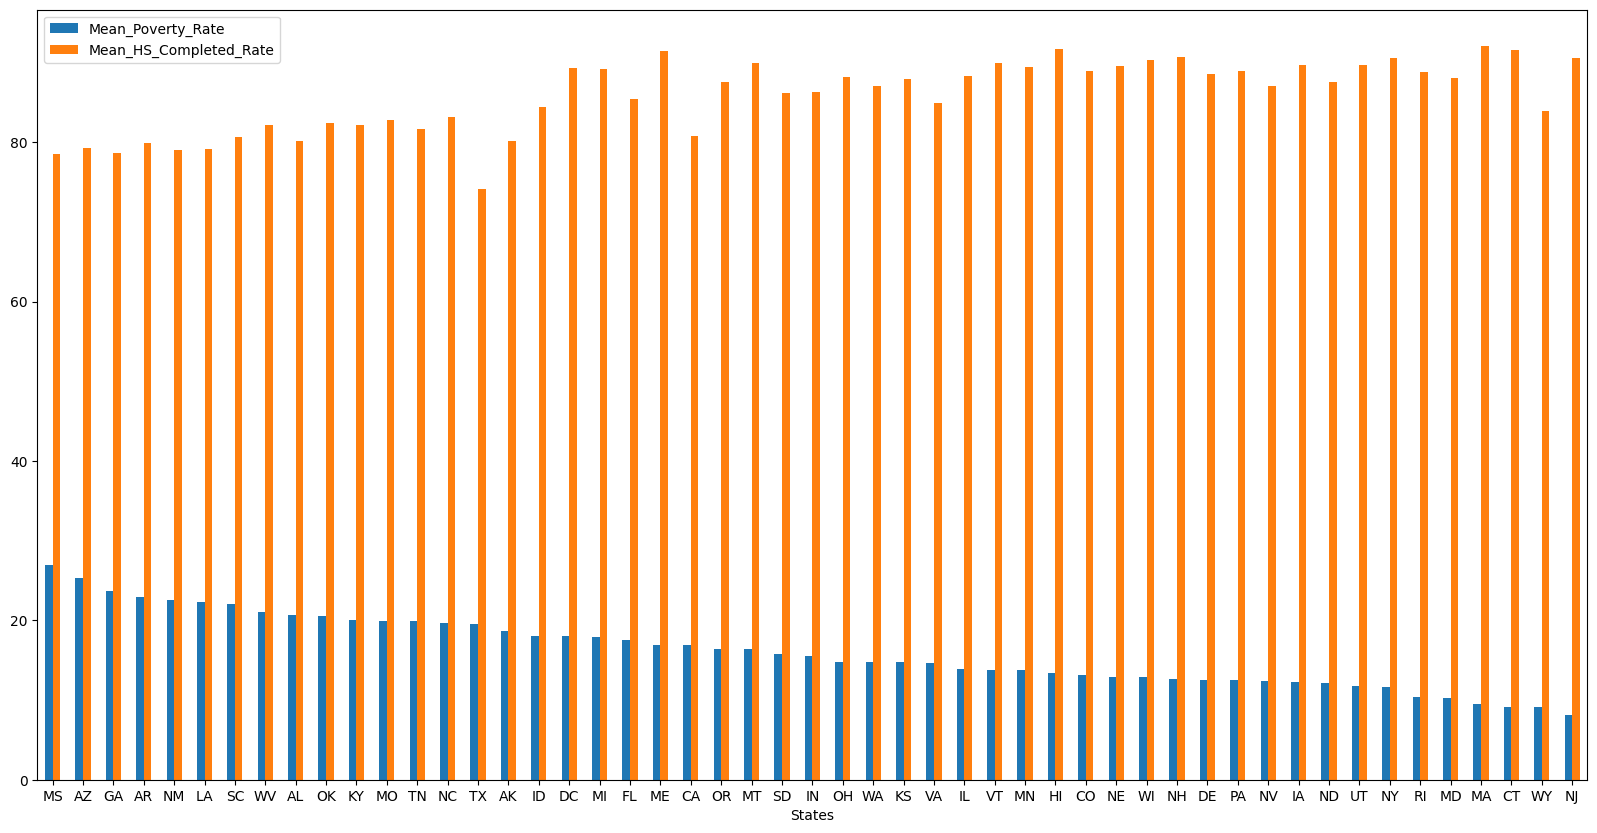

In [ ]:
ax = poverty_hscompleted_df.plot.bar(figsize=(20,10), rot=0)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Axes: xlabel='Mean_Poverty_Rate', ylabel='Mean_HS_Completed_Rate'>

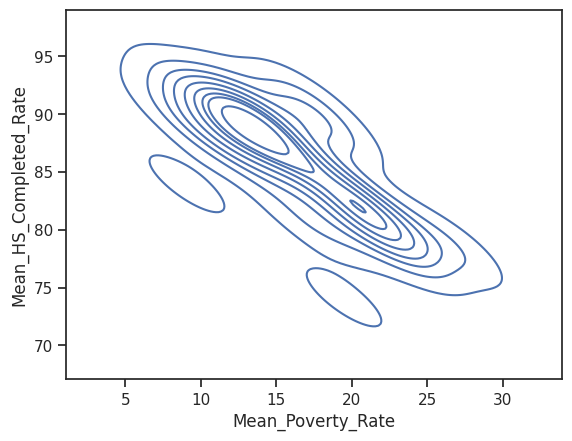

In [ ]:
sns.set_theme(style="ticks")

## Show the joint distribution using kernel density estimation
sns.kdeplot(data=poverty_hscompleted_df, x="Mean_Poverty_Rate", y="Mean_HS_Completed_Rate")


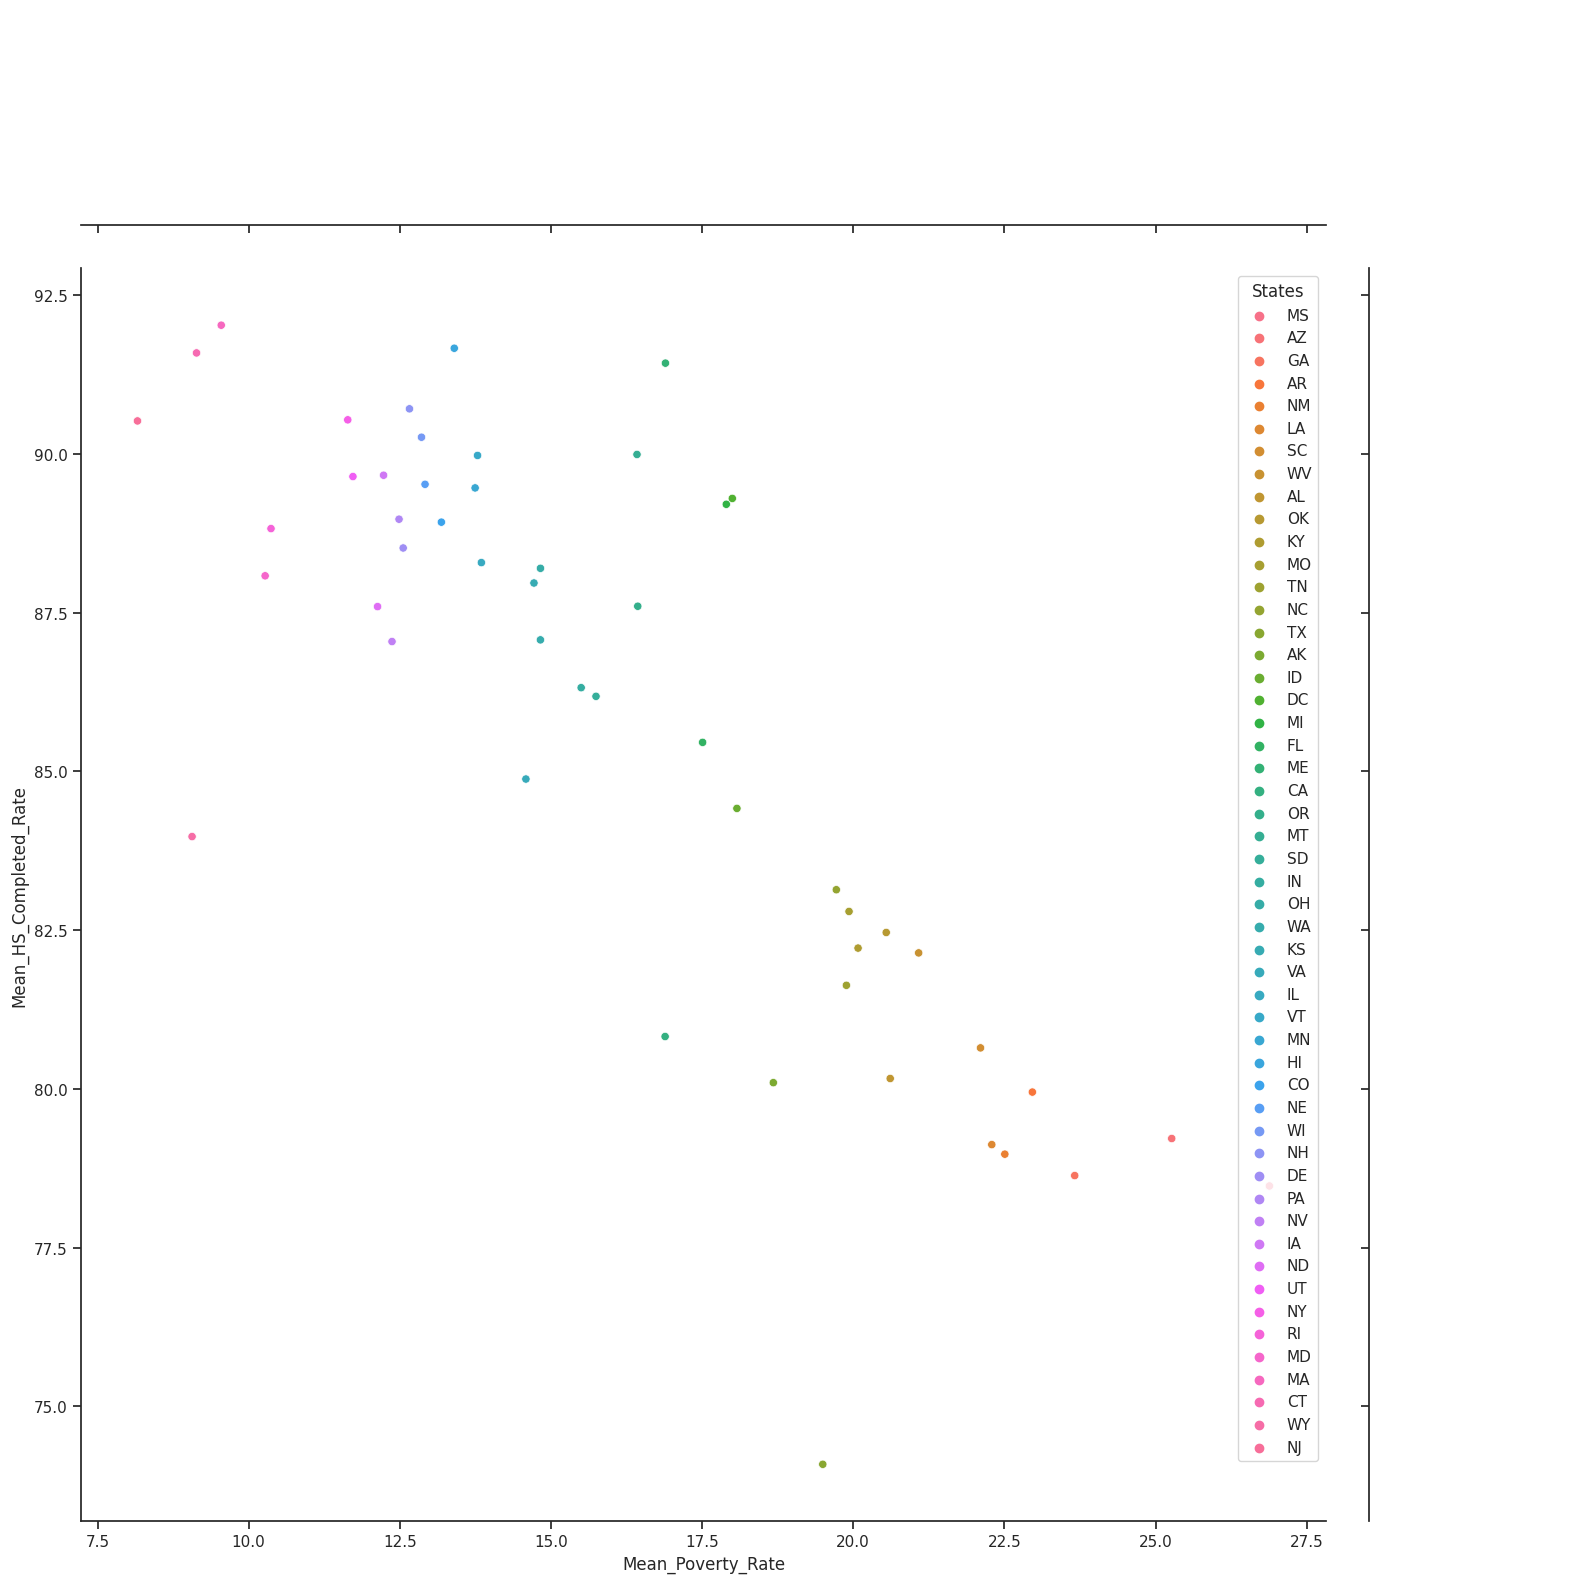

In [ ]:
## scatter plot
sns.jointplot(data=poverty_hscompleted_df,
             x="Mean_Poverty_Rate",
             y="Mean_HS_Completed_Rate",
             hue="States",
             height=16)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

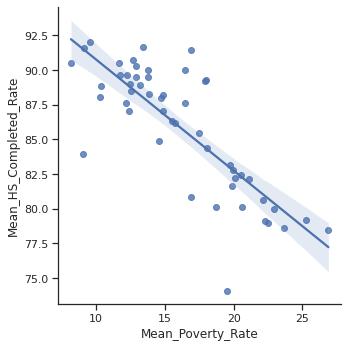

In [ ]:
sns.lmplot(x="Mean_Poverty_Rate", y="Mean_HS_Completed_Rate", data=poverty_hscompleted_df)

<AxesSubplot:xlabel='Mean_Poverty_Rate', ylabel='Mean_HS_Completed_Rate'>

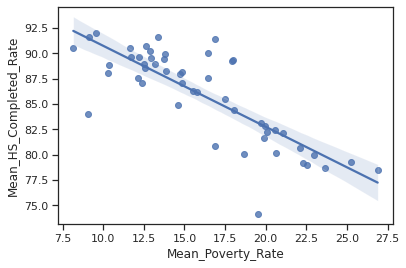

In [ ]:
sns.regplot(x="Mean_Poverty_Rate", y="Mean_HS_Completed_Rate", data=poverty_hscompleted_df)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
## Calculate the value of each race as the sum of percentage of each state
share_race_sum_df = cleaned_df_share_race_city.groupby('Geographic area').sum()
## Transpose the table
#share_race_sum_df.T
## Calculating percentage of every columns
total = share_race_sum_df.T.sum()
race_share_percentage = (share_race_sum_df.T / total) * 100
## Transpose the table again for visualization
race_share = race_share_percentage.T
race_share

<ipython-input-51-0781ab4d7ece>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,47.74,0.59,47.97,1.45,2.25
AL,72.54,23.33,0.66,0.48,2.98
AR,78.25,16.26,0.76,0.48,4.26
AZ,54.31,0.87,25.91,0.66,18.26
CA,64.45,2.41,1.55,4.99,26.59
CO,80.25,0.84,1.49,1.06,16.37
CT,83.83,4.86,0.64,2.91,7.76
DC,37.71,49.66,0.29,3.43,8.91
DE,75.06,15.15,0.52,1.97,7.30


In [ ]:
## This vidualization is better to make all the race share data of each state be 100% at total. ##
fig = px.bar(race_share, x=race_share.index, y=['share_hispanic','share_white','share_black','share_asian','share_native_american'], title='Average Race Share')
fig.show()

In [ ]:
## This vidualization is better to make all the race share data of each state be 100% at total. ##
## Visualization for Top 10
top10S_share_rate = race_share[race_share.index.isin(["MA", "HI", "CT", "ME", "NH", "NY", "NJ", "WI", "MT", "VT"])]
fig = px.bar(top10S_share_rate, x=top10S_share_rate.index, y=['share_hispanic','share_white','share_black','share_asian','share_native_american'], title='Average Race Share for Top 10 States of HS Graduation Rate')
fig.show()

In [ ]:
## Visualization for Least 10
least10S_share_rate = race_share[race_share.index.isin(["TX", "MS", "GA", "NM", "LA", "AZ", "AR", "AK", "AL", "SC"])]
fig = px.bar(least10S_share_rate, x=top10S_share_rate.index, y=['share_hispanic','share_white','share_black','share_asian','share_native_american'], title='Average Race Share for Top 10 States of HS Graduation Rate')
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
killed_race_rate = cleaned_df_fatalities.race.value_counts()
killed_race_rate

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [ ]:
fig = px.pie(labels=killed_race_rate.index,
values=killed_race_rate.values,
title="People Killed by Race",
names=killed_race_rate.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()


/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
## Race share as a whole country
country_race_share = race_share.sum()

total = country_race_share.sum()
country_race_percentage = (country_race_share / total) * 100

country_race_percentage

share_white             79.51
share_black              7.71
share_native_american    3.52
share_asian              2.01
share_hispanic           7.24
dtype: float64

In [ ]:
## Visualize race share as a whole country
fig = px.pie(labels=country_race_percentage.index,
values=country_race_percentage.values,
title="Race Share as a Whole Country",
names=country_race_percentage.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
killed_gender_rate = cleaned_df_fatalities.gender.value_counts()
killed_gender_rate

M    2160
F      94
Name: gender, dtype: int64

In [ ]:
fig = px.pie(labels=killed_gender_rate.index,
values=killed_gender_rate.values,
title="People Killed by Gender",
names=killed_gender_rate.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()


/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
# When you want to set multiple columns as conditions cols = ['col1', 'col2', 'col3']
#cleaned_df_fatalities[['manner_of_death', 'gender']].value_counts()

In [ ]:
# Box Plot is made by the values in 3 columns in a DataFrame
box = px.box(cleaned_df_fatalities,
             x='age',
             y='manner_of_death',
             color='gender',
             notched=True,
             points='all',
             title='Age and Manner of Death')

box.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
people_armed = cleaned_df_fatalities.armed.value_counts()

In [ ]:
fig = px.pie(labels=people_armed.index,
values=people_armed.values,
title="People Killed by Armed",
names=people_armed.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
num_all_age = cleaned_df_fatalities.age.count()
num_under25 = cleaned_df_fatalities[cleaned_df_fatalities.age< 25].age.count()
rate_under25 = num_under25 / num_all_age * 100    # 18.72%

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

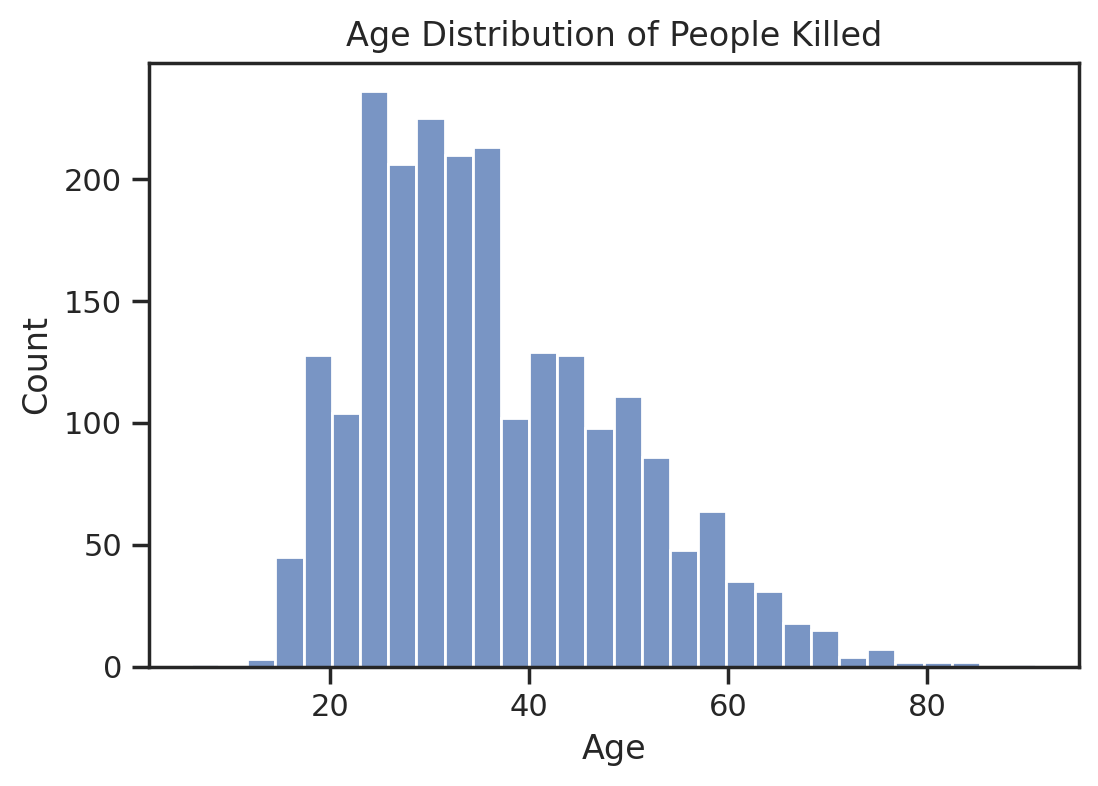

In [ ]:
plt.figure(dpi=200)
sns.histplot(data=cleaned_df_fatalities,
             x=cleaned_df_fatalities.age)

plt.xlabel('Age')
plt.title('Age Distribution of People Killed')
plt.show()

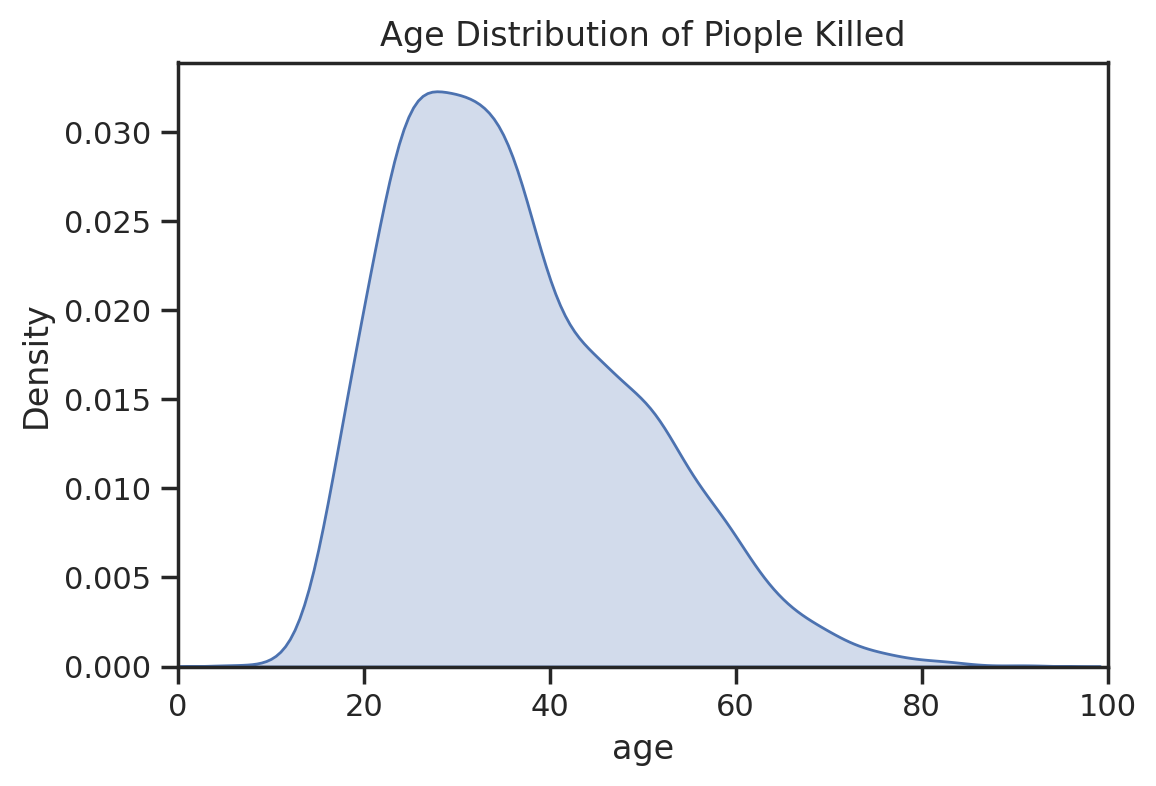

In [ ]:
# cleaned_df_fatalities.age.min()

plt.figure(dpi=200)
sns.kdeplot(cleaned_df_fatalities.age,
            shade=True)

plt.title('Age Distribution of Piople Killed')
plt.xlim(0, 100)
plt.show()


<Figure size 1200x800 with 0 Axes>

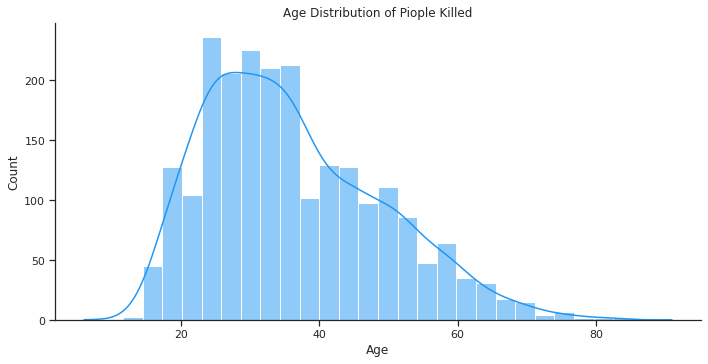

In [ ]:
plt.figure(dpi=200)
sns.displot(cleaned_df_fatalities.age,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title('Age Distribution of Piople Killed')
plt.xlabel('Age')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

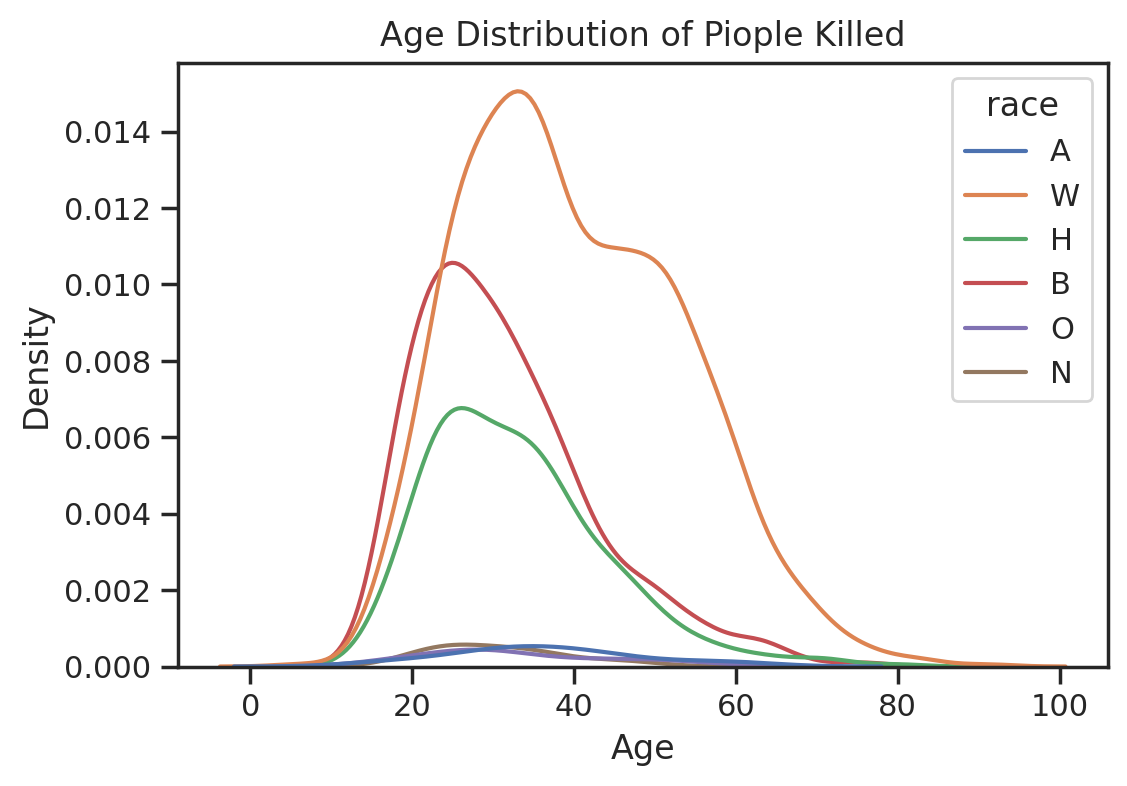

In [ ]:
plt.figure(dpi=200)

sns.kdeplot(data=cleaned_df_fatalities, x='age', hue="race")
# sns.kdeplot(
#    data=cleaned_df_fatalities, x='age', hue="race",
#    fill=True, common_norm=False, palette="crest",
#    alpha=.5, linewidth=1
# )

plt.title('Age Distribution of Piople Killed')
plt.xlabel('Age')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
killed_race_rate = cleaned_df_fatalities.race.value_counts()

In [ ]:
bar = px.bar(x=killed_race_rate.index,
             y=killed_race_rate.values,
             title="Number of People Killed by Race",
             color=killed_race_rate.index)

bar.update_layout(xaxis_title="Race", yaxis_title="Count")
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
num_killed = cleaned_df_fatalities.date.count()  # 2254
cleaned_df_fatalities.signs_of_mental_illness.value_counts() # False 1681, True 573

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [ ]:
573 / 2254 * 100 # 25.42%

25.42147293700089

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
num_killed_by_city = cleaned_df_fatalities.city.value_counts()

In [ ]:
bar = px.bar(x=num_killed_by_city.index[:10],
             y=num_killed_by_city.values[:10],
             title="Number of People Killed by City Top10",
             color=num_killed_by_city.index[:10])

bar.update_layout(xaxis_title="City", yaxis_title="Count")
bar.show()

In [ ]:
## Calculate the value of each race as the sum of percentage of each state
race_by_city = cleaned_df_share_race_city.groupby('City').sum()
## Transpose the table
# race_by_city.T
## Calculating percentage of every columns
city_total = race_by_city.T.sum()
city_race_percentage = (race_by_city.T / city_total) * 100
## Transpose the table again for visualization
city_race_share = city_race_percentage.T
city_race_share

<ipython-input-87-f156c53cb178>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,share_white,share_black,share_native_american,share_asian,share_hispanic
City,,,,,
Aaronsburg CDP (Centre County),99.30,0.20,0.00,0.00,0.50
Aaronsburg CDP (Washington County),95.57,1.58,1.26,0.00,1.58
Abanda CDP,67.88,30.51,0.00,0.00,1.62
Abbeville city,47.93,47.03,0.17,1.77,3.09
Abbeville town,90.65,8.84,0.00,0.00,0.50
...,...,...,...,...,...
Zumbrota city,96.48,0.70,0.50,0.70,1.61
Zuni Pueblo CDP,1.09,0.10,95.95,0.30,2.57
Zurich city,100.00,0.00,0.00,0.00,0.00


In [ ]:
## Visualization Race Share for Top 10 City
top10C_share_rate = city_race_share[city_race_share.index.isin(["Los Angeles city", "Phoenix city", "Houston city", "Chicago city", "Austin city", "Las Vegas city", "Columbus city", "Miami city", "San Antonio city", "Indianapolis city"])]
# top10C_share_rate
fig = px.bar(top10C_share_rate, x=top10C_share_rate.index, y=['share_hispanic','share_white','share_black','share_asian','share_native_american'], title='Average Race Share for Top 10 States of HS Graduation Rate')
fig.show()

In [ ]:
num_killed_by_state = cleaned_df_fatalities.state.value_counts()

In [ ]:
bar = px.bar(x=num_killed_by_state.index[:10],
             y=num_killed_by_state.values[:10],
             title="Number of People Killed by State",
             color=num_killed_by_state.index[:10])

bar.update_layout(xaxis_title="State", yaxis_title="Count")
bar.show()

In [ ]:
## Visualization for Top 10 states that have the most number of people killed
top10K_share_rate = race_share[race_share.index.isin(["CA", "TX", "FL", "AZ", "OH", "NC", "OK", "CO", "GA", "MO"])]
fig = px.bar(top10K_share_rate, x=top10K_share_rate.index, y=['share_hispanic','share_white','share_black','share_asian','share_native_american'], title='Average Race Share for Top 10 States of HS Graduation Rate')
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
top10_cleaned_df_fatalities = cleaned_df_fatalities[cleaned_df_fatalities['city'].isin(["Los Angeles", "Phoenix", "Huston", "Chicago", "Austin", "Las Vegas", "Columbs", "Miami", "San Antonio", "Indianapolis"])]

### This didn't really work ###
# bar = px.bar(x= top10_cleaned_df_fatalities.city,
#              y= top10_cleaned_df_fatalities.race,
#              title="Number of People Killed by City",
#              color=top10_cleaned_df_fatalities.race)

# bar.update_layout(xaxis_title="City", yaxis_title="Count", yaxis_range=(0, 50))
# bar.show()

In [ ]:
top10S_cleaned_df_fatalities = cleaned_df_fatalities[cleaned_df_fatalities['state'].isin(["CA", "TX", "FL", "AZ", "OH", "NC", "OK", "CO", "GA", "MO"])]


In [ ]:
top10_city_race = top10_cleaned_df_fatalities[['city', 'race']].value_counts()
top10_city_race = top10_city_race.reset_index()
top10_city_race = top10_city_race.rename({0: 'counts'}, axis=1)
top10_city_race

,city,race,counts
0,Chicago,B,19
1,Los Angeles,H,18
2,Austin,W,13
3,Phoenix,W,12
4,San Antonio,H,11
5,Phoenix,H,11
6,Los Angeles,B,10
7,Indianapolis,B,9
8,Las Vegas,W,9
9,Miami,B,7


In [ ]:
top10_state_race = top10S_cleaned_df_fatalities[['state', 'race']].value_counts()
top10_state_race = top10_state_race.reset_index()
top10_state_race = top10_state_race.rename({0: 'counts'}, axis=1)
top10_state_race

,state,race,counts
0,CA,H,159
1,CA,W,122
2,TX,W,90
3,FL,W,68
4,CA,B,62
5,TX,H,61
6,AZ,W,56
7,FL,B,47
8,OK,W,45
9,TX,B,44


In [ ]:
bar = px.bar(x= top10_city_race.city,
             y= top10_city_race.counts,
             title="Number of People Killed by City",
             color=top10_city_race.race)

bar.update_layout(xaxis_title="City", yaxis_title="Count", yaxis_range=(0, 40))
bar.show()

In [ ]:
bar = px.bar(x= top10_state_race.state,
             y= top10_state_race.counts,
             title="Number of People Killed by State",
             color=top10_state_race.race)

bar.update_layout(xaxis_title="State", yaxis_title="Count", yaxis_range=(0, 400))
bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
people_killed_by_states = cleaned_df_fatalities.state.value_counts()

In [ ]:
world_map = px.choropleth(people_killed_by_states,
                          locations=people_killed_by_states.index,
                          locationmode="USA-states",
                          color=people_killed_by_states.values,
                          scope="usa",
                          hover_name=people_killed_by_states.index,
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
# cleaned_df_fatalities.date = pd.to_datetime(cleaned_df_fatalities.date, utc=True)
# cleaned_df_fatalities.date = cleaned_df_fatalities.date.dt.strftime('%Y-%m')
# killed_over_time = cleaned_df_fatalities.date.value_counts()
killed_over_time

2015-04    87
2015-03    86
2015-05    84
2015-09    84
2015-10    83
2015-08    82
2015-07    81
2016-06    81
2016-03    81
2016-01    80
2016-02    78
2015-02    76
2016-05    76
2015-11    76
2016-11    74
2016-08    73
2015-12    73
2016-04    70
2017-01    70
2016-07    70
2015-01    68
2016-10    68
2015-06    67
2016-09    65
2017-02    63
2017-03    62
2016-12    57
2017-04    52
2017-05    44
2017-06    42
2017-07    34
2017-10    15
2017-12    15
2017-09    14
2017-08    12
2017-11    11
Name: date, dtype: int64

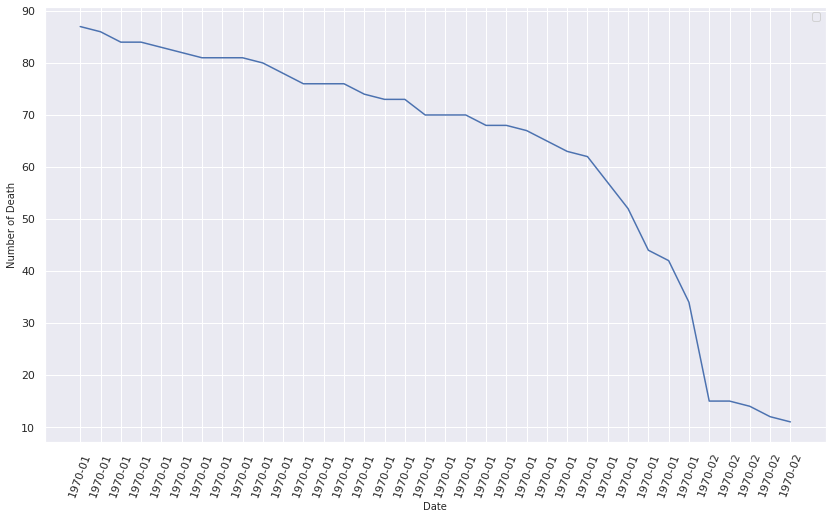

In [ ]:
# plt.figure(figsize=(8,4))
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.xlabel('Date', fontsize=10)
# plt.ylabel('Number of Death', fontsize=10)
# plt.ylim(400,1000)

# plt.plot(killed_over_time.index, killed_over_time.values)

import matplotlib.dates as mdates
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data= killed_over_time, x = killed_over_time.index, y = killed_over_time.values)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )

plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of Death', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.show()

In [ ]:
killed_over_time.values.min() #max 947, min434

11

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

The most crucial problem that this analysis shows is that the ratio of Blak and Hispanic people who were killed was too big for the race share rate of United States. I assume that this is why people has been saying that the racial discrimination by police officers could be the root cause for this.

